<a href="https://colab.research.google.com/github/MWesner3344/DSCI-592/blob/main/ImageSegmentationEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from basic_image_eda import BasicImageEDA
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import cv2, os, collections

## Drone Dataset EDA

#### Original Images


found 400 images.


  0%|          | 0/400 [00:00<?, ?it/s]

Using 32 threads. (max:32)



100%|██████████| 400/400 [00:59<00:00,  6.69it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  400

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  4000
max height                               |  4000
mean height                              |  4000.0
median height                            |  4000

min width                                |  6000
max width                                |  6000
mean width                               |  6000.0
median width                             |  6000

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [4000 6000] (h x w, multiples of 8)
recommended input size(by mean)          |  [4000 6000] (h x w, multiples of 16)
recommended input size(by

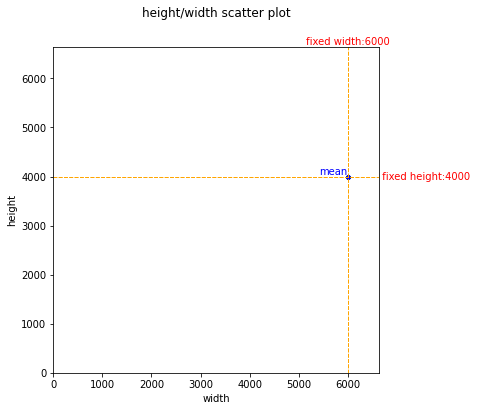

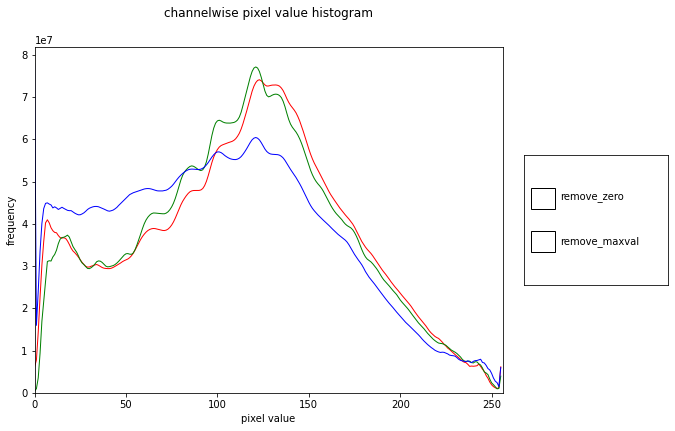

In [ ]:
if __name__ == "__main__":  # for multiprocessing
    data_dir = "./original_images/"
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0
    
    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

#### Image Labels


found 400 images.


  0%|          | 0/400 [00:00<?, ?it/s]

Using 32 threads. (max:32)



100%|██████████| 400/400 [00:23<00:00, 17.12it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  400

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  4000
max height                               |  4000
mean height                              |  4000.0
median height                            |  4000

min width                                |  6000
max width                                |  6000
mean width                               |  6000.0
median width                             |  6000

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [4000 6000] (h x w, multiples of 8)
recommended input size(by mean)          |  [4000 6000] (h x w, multiples of 16)
recommended input size(by

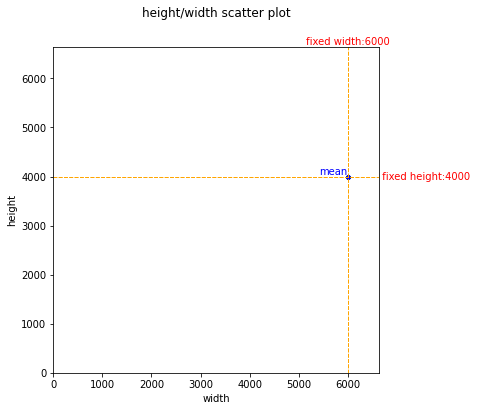

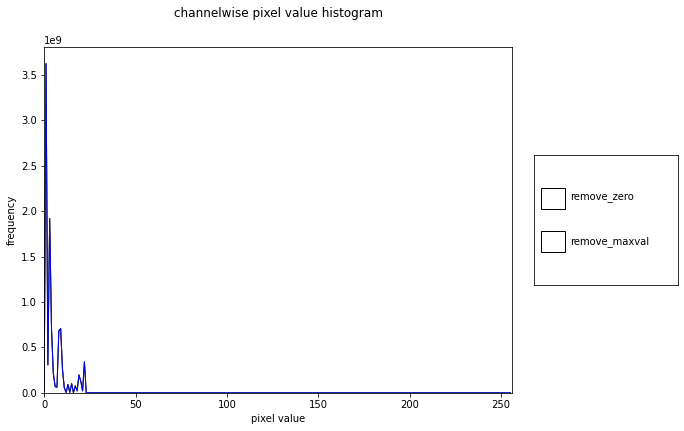

In [ ]:
if __name__ == "__main__":  # for multiprocessing
    data_dir = "./label_images_semantic/"
    extensions = ['png', 'jpg', 'jpeg']e
    
    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [ ]:
label_df = pd.read_csv('class_dict_seg.csv')
label_df.set_index('name', inplace=True)
label_df

,r,g,b
name,,,
unlabeled,0,0,0
paved-area,128,64,128
dirt,130,76,0
grass,0,102,0
gravel,112,103,87
water,28,42,168
rocks,48,41,30
pool,0,50,89
vegetation,107,142,35


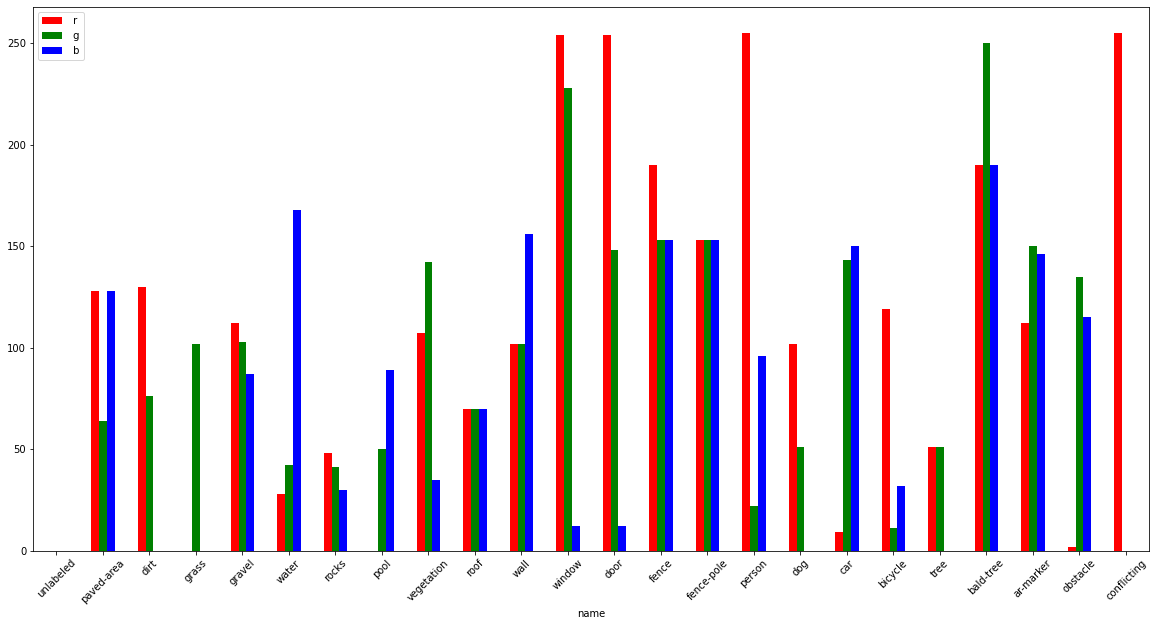

In [ ]:
label_df.plot(kind='bar', rot=45, figsize=(20, 10), color=['r', 'g', 'b']);

## Pet Dataset

#### Image Labels


found 7390 images.


  3%|▎         | 232/7390 [00:00<00:03, 2294.18it/s]

Using 32 threads. (max:32)



100%|██████████| 7390/7390 [00:02<00:00, 3002.10it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  7390

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  103
max height                               |  2606
mean height                              |  390.9136671177267
median height                            |  375

min width                                |  114
max width                                |  3264
mean width                               |  436.7451962110961
median width                             |  500

mean height/width ratio                  |  0.8950611718435084
median height/width ratio                |  0.75
recommended input size(by mean)          |  [392 440] (h x w, multiples of 8)
recommended input size(by mean)          |  [384 432] (h x w, multiples of 16)
recommended input size(b

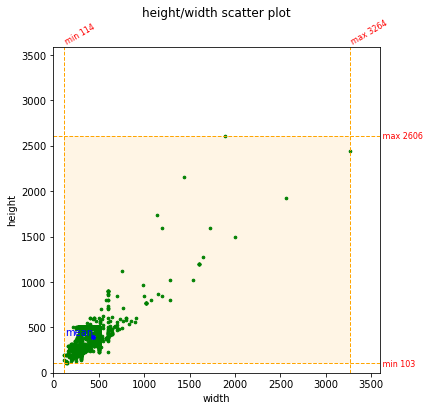

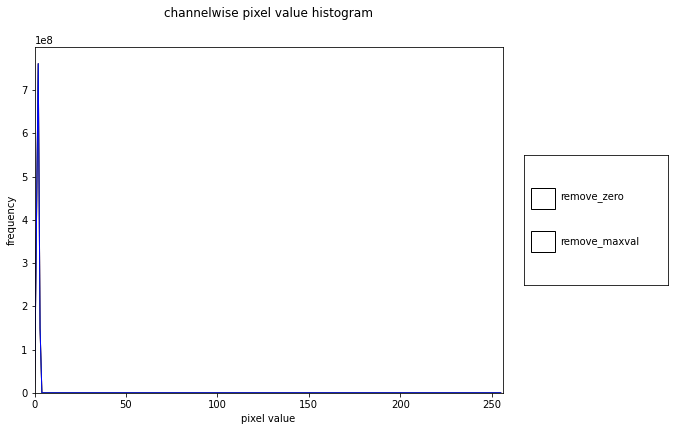

In [ ]:
if __name__ == "__main__":  # for multiprocessing
    data_dir = "./trimaps/"
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0
    
    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [ ]:
pet_dir1 = './trimaps/'
pets_df = pd.DataFrame(columns=['img_mask'])
k = 0
# load ground truth data
for filename in sorted(os.listdir(pet_dir1)):
    if filename.startswith('._'):
        continue  
    elif filename.endswith(".png"):
        pets_df.loc[k, 'img_mask'] = np.asarray(Image.open(pet_dir1 + filename)).flatten()
    else:
        continue
    k = k+1

In [ ]:
rgb = pets_df['img_mask'].values

In [ ]:
for i in rgb:
    x = collections.Counter(i)

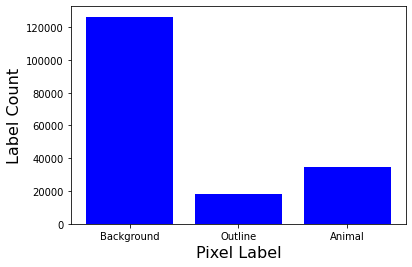

In [ ]:
keys = np.array(['Background','Outline','Animal'])
pos = np.arange(len(keys))
plt.bar(keys, x.values(), color='b')
plt.xticks(pos, keys)
plt.xlabel('Pixel Label', fontsize=16)
plt.ylabel('Label Count', fontsize=16)
plt.show()

#### Original Images


found 7384 images.


  1%|          | 51/7384 [00:00<00:14, 508.42it/s]

Using 32 threads. (max:32)



100%|██████████| 7384/7384 [00:10<00:00, 709.58it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  7384

dtype                                    |  uint8
channels                                 |  [1, 3, 4]
extensions                               |  ['jpg']

min height                               |  103
max height                               |  2606
mean height                              |  391.05471289274107
median height                            |  375

min width                                |  114
max width                                |  3264
mean width                               |  436.89084507042253
median width                             |  500

mean height/width ratio                  |  0.8950856199097211
median height/width ratio                |  0.75
recommended input size(by mean)          |  [392 440] (h x w, multiples of 8)
recommended input size(by mean)          |  [384 432] (h x w, multiples of 16)
recommended inpu

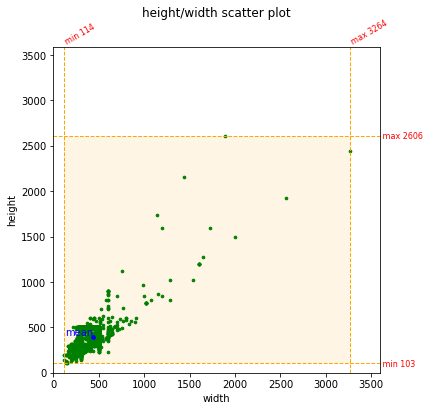

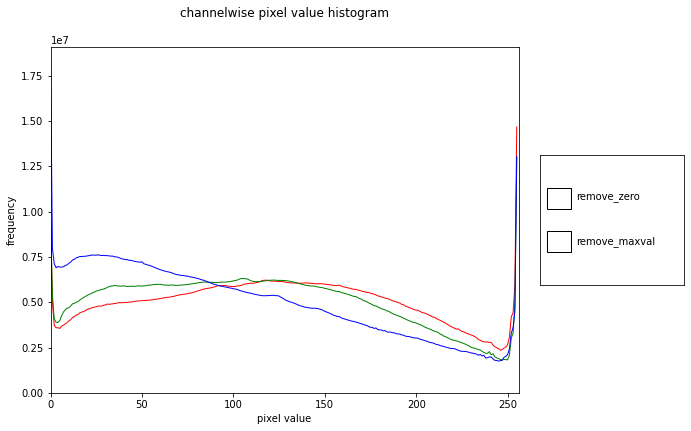

In [ ]:
if __name__ == "__main__":  # for multiprocessing
    data_dir = "./pet_images/"
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0
    
    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)